# heatmap using seaborn

* Plot rectangular data as a color-encoded matrix.
* This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.
* <code>seaborn.heatmap(data=,...)</code>
* [seaborn docs for heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

-----------

## Data wrangling

In [2]:
df=pd.read_csv("data\Compustat_from_1990.csv")[['fyear', 'tic', 'at', 'sale', 'ni', 'ib', 'oancf', 'mv']] # mv is already in million dollars.
df['accr']= df['ni'] - df['oancf']
df= df[df.fyear>=2015]
print(df.shape)
df.head()

(31983, 9)


,fyear,tic,at,sale,ni,ib,oancf,mv,accr
25,2015,AIR,1442.1,1662.6,47.7,40.5,32.1,842.51115,15.6
26,2016,AIR,1504.1,1767.6,56.5,50.2,21.8,1200.32876,34.7
27,2017,AIR,1524.7,1748.3,15.6,73.7,64.3,1551.45804,-48.7
28,2018,AIR,1517.2,2051.8,7.5,84.1,67.4,1046.77092,-59.9
29,2019,AIR,2079.0,2089.3,4.4,24.8,-36.1,707.90649,40.5


In [3]:
vars_list= ['at', 'sale', 'ni', 'ib', 'oancf', 'accr', 'mv']
corr=df[vars_list].corr()
print(f"Correlation matrix:\n\n{corr}")

Correlation matrix:

             at      sale        ni        ib     oancf      accr        mv
at     1.000000  0.830226  0.619107  0.623610  0.848966 -0.683764  0.640954
sale   0.830226  1.000000  0.560505  0.565958  0.789037 -0.649442  0.597257
ni     0.619107  0.560505  1.000000  0.988464  0.750317 -0.180554  0.743280
ib     0.623610  0.565958  0.988464  1.000000  0.758114 -0.202950  0.749778
oancf  0.848966  0.789037  0.750317  0.758114  1.000000 -0.785686  0.803714
accr  -0.683764 -0.649442 -0.180554 -0.202950 -0.785686  1.000000 -0.504583
mv     0.640954  0.597257  0.743280  0.749778  0.803714 -0.504583  1.000000


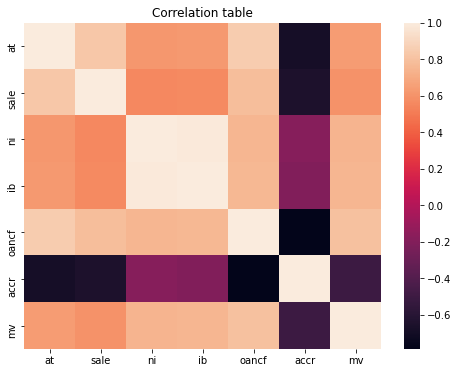

In [4]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr)
ax.set_title('Correlation table')
plt.show()

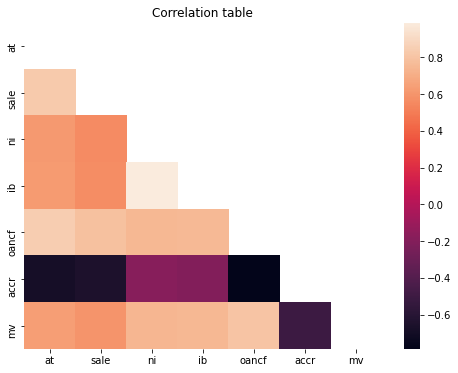

In [5]:
mask = np.triu(np.ones_like(corr, dtype=bool)) # a mask for upper triangle
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, mask= mask)
ax.set_title('Correlation table')
plt.show()

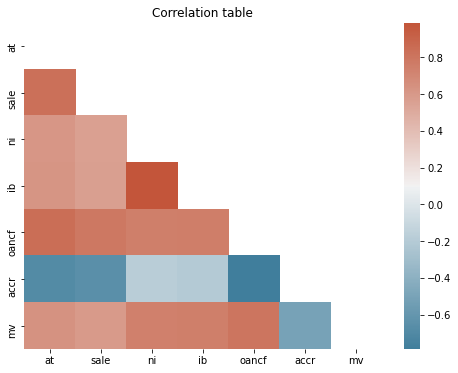

In [6]:
cmap = sns.diverging_palette(230, 20, as_cmap=True) # custom colormap
mask = np.triu(np.ones_like(corr, dtype=bool)) # a mask for upper triangle
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, mask= mask, cmap= cmap)
ax.set_title('Correlation table')
plt.show()

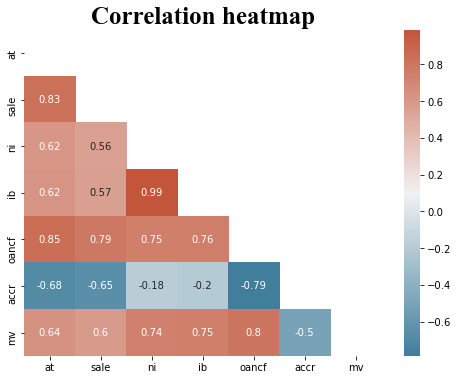

In [7]:
cmap = sns.diverging_palette(230, 20, as_cmap=True) # custom colormap
mask = np.triu(np.ones_like(corr, dtype=bool)) # a mask for upper triangle
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, mask = mask, cmap=cmap, annot=True) # add annotation
ax.set_title('Correlation heatmap', fontsize= 25, fontname='times new roman', weight='bold')
plt.show()

It's now easy to tell positive correlation coefficients from negative ones!

In [8]:
f.savefig('../assets/images/correlation-heatmap.jpg')

-----------